In [1]:
import gspread
from google.oauth2.service_account import Credentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = Credentials.from_service_account_file('../google-secret.json', scopes=scope)
gs = gspread.authorize(credentials)

In [2]:
data_file = gs.open_by_url('https://docs.google.com/spreadsheets/d/1ierEhD6gcq51HAm433knjnVwey4ZE5DCnu1bW7PRG3E/edit?usp=sharing')
data_sheet = data_file.worksheet('Testy')

In [3]:
import pandas as pd

rows = data_sheet.get_all_values()
df = pd.DataFrame(rows[5:]).T.iloc[1:15].T
df.columns = rows[4][1:15]

df = df[[u'Data', u'Liczba wykonanych testów', u'Wyniki pozytywne', u'Wyniki negatywne']]
df.columns = ['Date', 'Total', 'Positive', 'Negative']

df.index = pd.to_datetime(df.Date.map(lambda d: '.'.join(d.split('.')[::-1]+['2020'])))
df = df.drop(columns=['Date'])
df.Total = pd.to_numeric(df.Total)
df.Positive = pd.to_numeric(df.Positive)
df.Negative = pd.to_numeric(df.Negative)

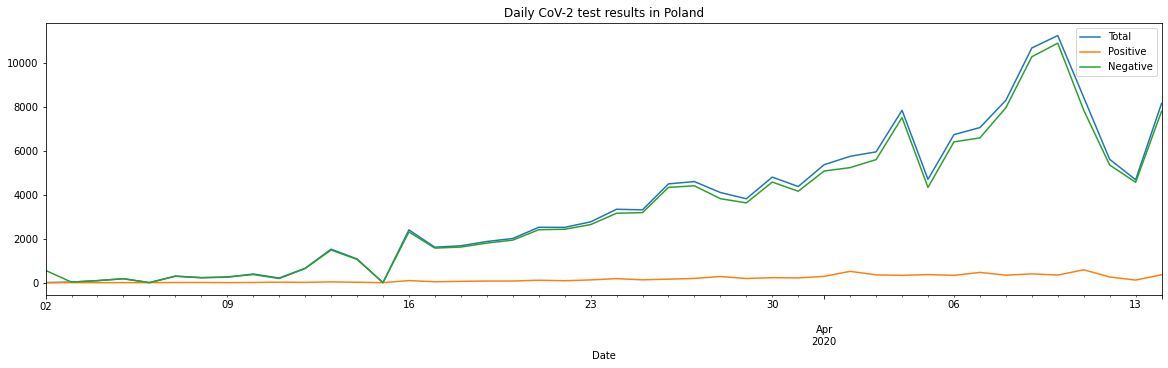

In [4]:
df.plot(figsize=(20,5), title='Daily CoV-2 test results in Poland');